In [ ]:
#import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/DimensionTables.xlsx')

In [ ]:
df

,Customer ID,Company Name,Status,Line of Business,City,State
0,1339104,Dwarf Acoustics,A,Canteens,Winthrop,WA
1,1339740,Fire Softwares,A,Canteens,Winthrop,WA
2,1339884,Granite Intelligence,A,Canteens,Winthrop,WA
3,1340322,Thorecords,A,Canteens,Winthrop,WA
4,4837795,Green-Plus,A,Canteens,Winthrop,WA
...,...,...,...,...,...,...
1406,5719211,Root man,A,Distributors Lv2,Port Hadlock,WA
1407,5736631,Signal land,A,Drugstore,Port Hadlock,WA
1408,5745024,Ace show,A,Markets Lv1,Port Hadlock,WA
1409,5806900,Blossom books,A,Wholesale Lv2,Port Hadlock,WA


In [ ]:
df.shape

(1411, 6)

In [ ]:
df.columns.values

array(['Customer ID', 'Company Name', 'Status', 'Line of Business',
       'City', 'State'], dtype=object)

In [ ]:
df.columns

Index(['Customer ID', 'Company Name', 'Status', 'Line of Business', 'City',
       'State'],
      dtype='object')

In [ ]:
# Checking the data types of all the columns
df.dtypes

Customer ID          int64
Company Name        object
Status              object
Line of Business    object
City                object
State               object
dtype: object

In [ ]:
df['Status'].value_counts()

A    1364
I      47
Name: Status, dtype: int64

In [ ]:
df['Status'].value_counts()/len(df)*100

A    96.669029
I     3.330971
Name: Status, dtype: float64

In [ ]:
100*df['Status'].value_counts()/len(df['Status'])

A    96.669029
I     3.330971
Name: Status, dtype: float64

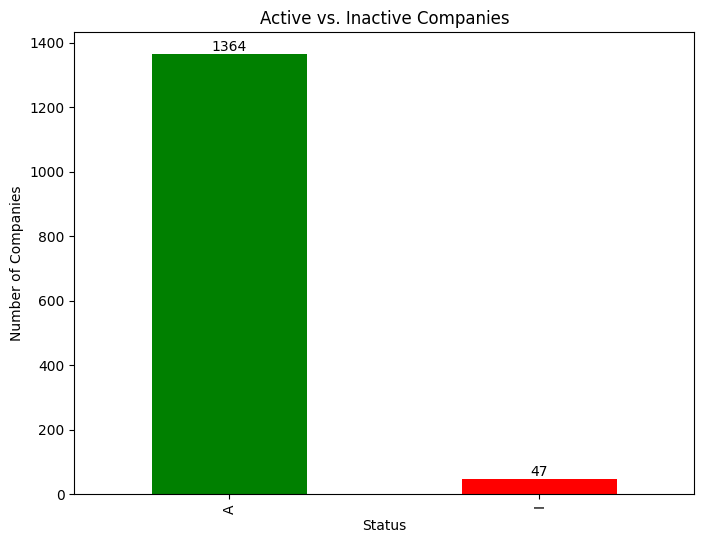

In [ ]:

# Count the number of active and inactive companies
status_counts = df['Status'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
status_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Active vs. Inactive Companies')
plt.xlabel('Status')
plt.ylabel('Number of Companies')

# Add labels to the bars
for i, count in enumerate(status_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [ ]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411 entries, 0 to 1410
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Customer ID       1411 non-null   int64 
 1   Company Name      1411 non-null   object
 2   Status            1411 non-null   object
 3   Line of Business  1411 non-null   object
 4   City              1411 non-null   object
 5   State             1411 non-null   object
dtypes: int64(1), object(5)
memory usage: 66.3+ KB


In [ ]:
df.isnull().sum()

Customer ID         0
Company Name        0
Status              0
Line of Business    0
City                0
State               0
dtype: int64

**DATA CLEANING**


In [ ]:
new_df = df.copy()

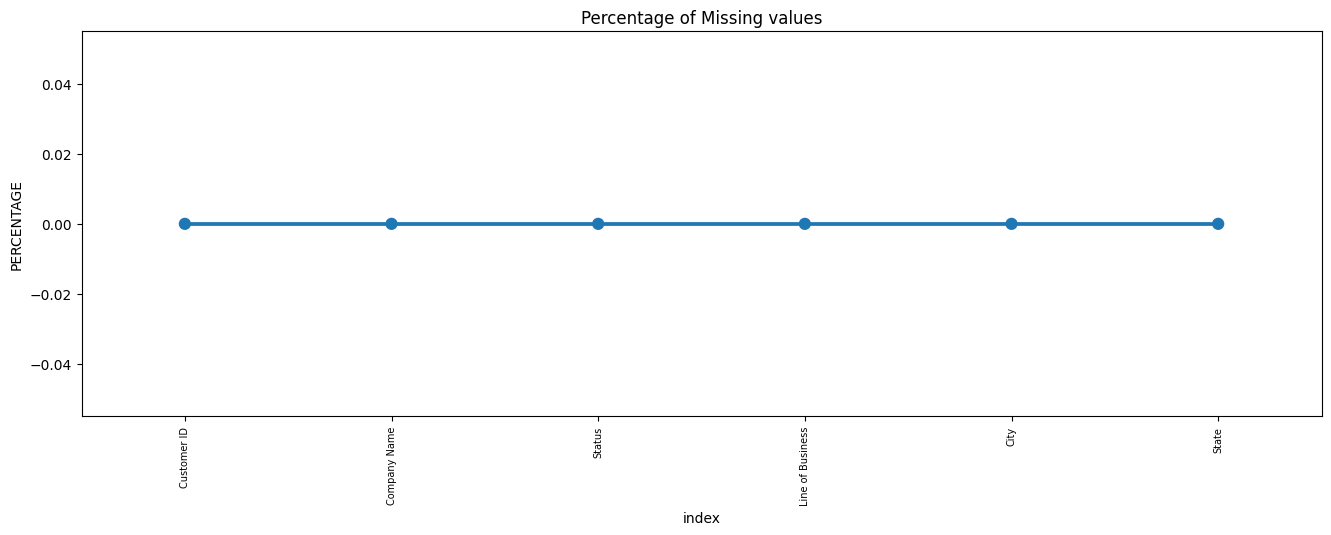

In [ ]:
missing = pd.DataFrame((new_df.isnull().sum())*100/new_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [ ]:
#Removing missing values
new_df.dropna(how = 'any', inplace = True)
#new_df.fillna(0)

## Data Exploration

### Univariate Analysis

In [ ]:
new_df.shape

(1411, 6)

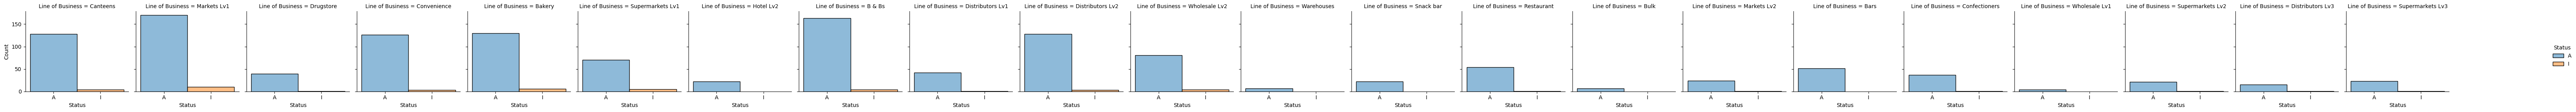

In [ ]:
# Create histograms or KDE plots for active and inactive companies by 'Line of Business'
g = sns.FacetGrid(df, col='Line of Business', hue='Status', margin_titles=True)
g.map(sns.histplot, 'Status', bins=2, common_norm=False, alpha=0.5)
g.set_axis_labels('Status')
g.add_legend()
plt.show()

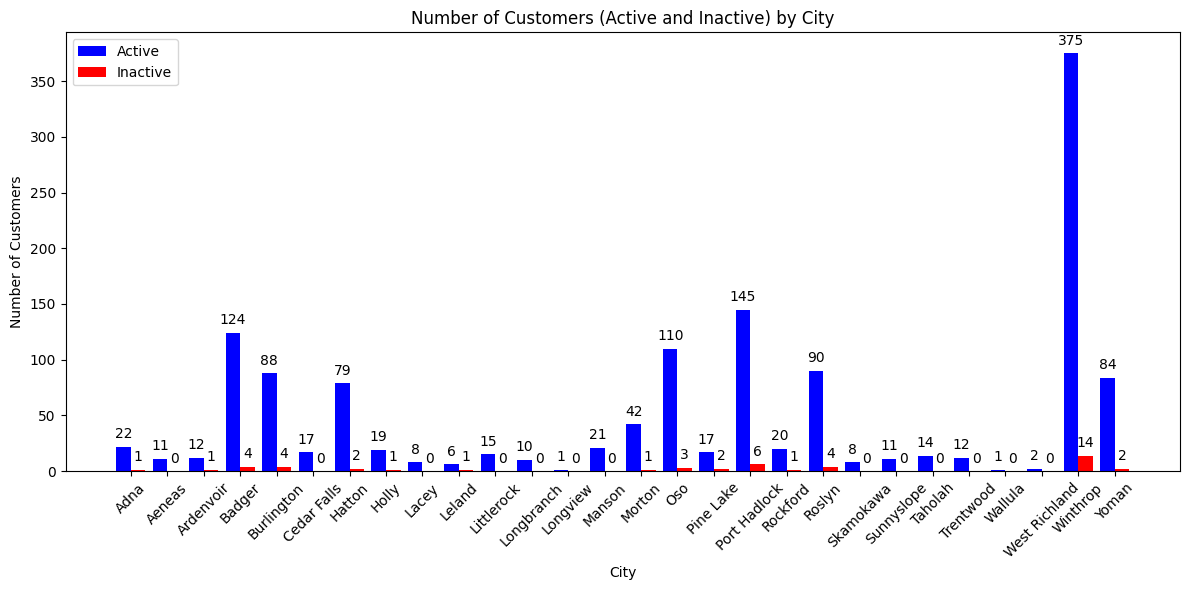

In [ ]:
# Group the customers by city and count the number of customers in each city for both active and inactive
city_counts = df.groupby(['City', 'Status']).size().unstack(fill_value=0)

# Create a grouped bar chart with y-axis labels
plt.figure(figsize=(12, 6))

# Set the width of each bar
bar_width = 0.4
index = np.arange(len(city_counts.index))

# Create bars for active and inactive customers
plt.bar(index, city_counts['A'], bar_width, label='Active', color='blue')
plt.bar(index + bar_width, city_counts['I'], bar_width, label='Inactive', color='red')

plt.title('Number of Customers (Active and Inactive) by City')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(index + bar_width / 2, city_counts.index, rotation=45)
plt.legend()

# Add y-axis labels
for i, (a, b) in enumerate(zip(city_counts['A'], city_counts['I'])):
    plt.text(i, a + 5, str(a), ha='center', va='bottom')
    plt.text(i + bar_width, b + 5, str(b), ha='center', va='bottom')

plt.tight_layout()

# Display the grouped bar chart with y-axis labels
plt.show()






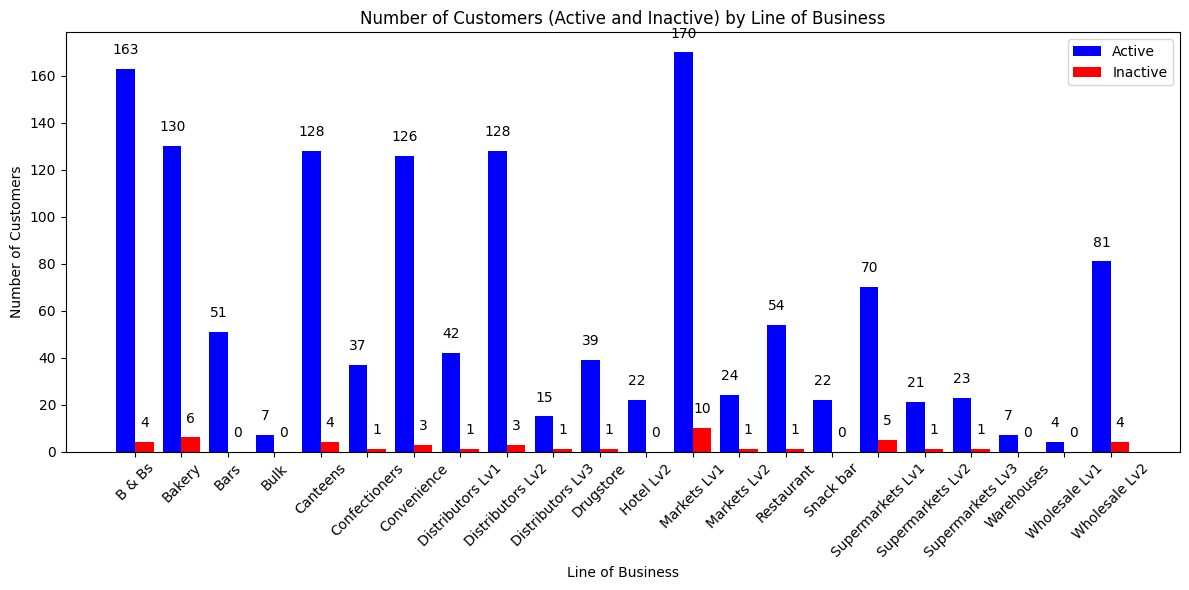

In [ ]:
# Group the customers by Line of Business and count the number of customers in each Line of Business for both active and inactive
line_of_business_counts = df.groupby(['Line of Business', 'Status']).size().unstack(fill_value=0)

# Create a grouped bar chart with y-axis labels
plt.figure(figsize=(12, 6))

# Set the width of each bar
bar_width = 0.4
index = np.arange(len(line_of_business_counts.index))

# Create bars for active and inactive customers
plt.bar(index, line_of_business_counts['A'], bar_width, label='Active', color='blue')
plt.bar(index + bar_width, line_of_business_counts['I'], bar_width, label='Inactive', color='red')

plt.title('Number of Customers (Active and Inactive) by Line of Business')
plt.xlabel('Line of Business')
plt.ylabel('Number of Customers')
plt.xticks(index + bar_width / 2, line_of_business_counts.index, rotation=45)
plt.legend()

# Add y-axis labels
for i, (a, b) in enumerate(zip(line_of_business_counts['A'], line_of_business_counts['I'])):
    plt.text(i, a + 5, str(a), ha='center', va='bottom')
    plt.text(i + bar_width, b + 5, str(b), ha='center', va='bottom')

plt.tight_layout()

# Display the grouped bar chart with y-axis labels
plt.show()


###**Bivariate Analysis**

In [ ]:
new_df['Status'] = np.where(new_df.Status == 'A',1,0)

In [ ]:
new_df.tail()

,Customer ID,Company Name,Status,Line of Business,City,State
1406,5719211,Root man,1,Distributors Lv2,Port Hadlock,WA
1407,5736631,Signal land,1,Drugstore,Port Hadlock,WA
1408,5745024,Ace show,1,Markets Lv1,Port Hadlock,WA
1409,5806900,Blossom books,1,Wholesale Lv2,Port Hadlock,WA
1410,5808550,Cavern scape,1,Markets Lv1,Port Hadlock,WA


In [ ]:
new_df1_target0=new_df.loc[new_df["Status"]==0] #inactive Customers
new_df1_target1=new_df.loc[new_df["Status"]==1] #active Customers

In [ ]:
len(new_df1_target0)

47

In [ ]:
len(new_df1_target1)

1364

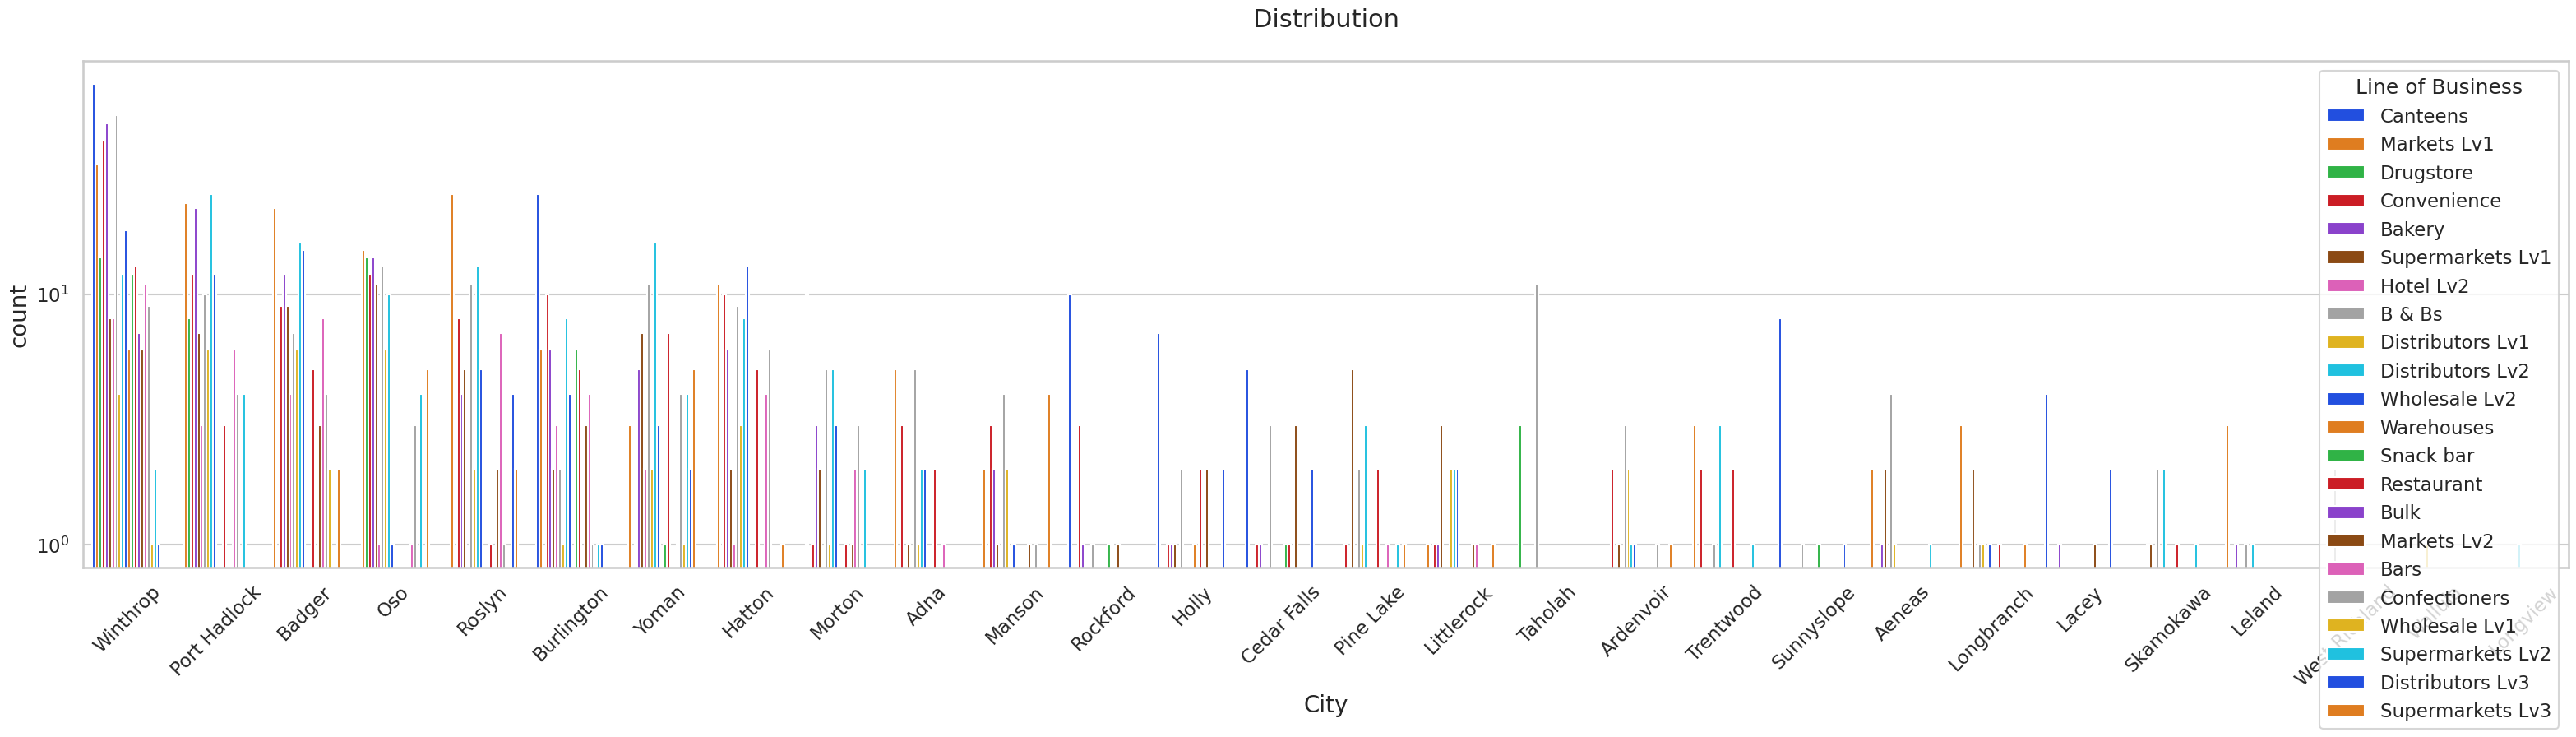

In [ ]:
uniplot(new_df1_target1,col='City',title='Distribution',hue='Line of Business')

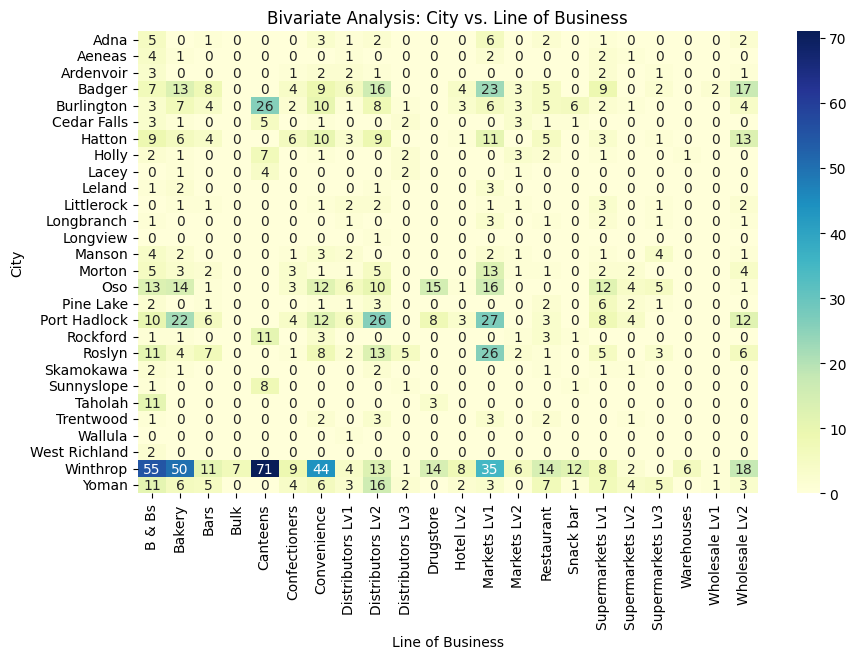

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Create a cross-tabulation (contingency table)
cross_tab = pd.crosstab(df['City'], df['Line of Business'])

# Visualize the cross-tabulation using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Bivariate Analysis: City vs. Line of Business')
plt.show()

####Insights


1.   Most of the Customers/Line of business are active  with a ratio of 97:3

2.  Market Lv1 is the one have highest number of active custimers who are doing business with the company  followed by B and bs

3. Wintrop is the city with the highest number of active cx
Winthrop is the city with most number of active customers of about 375 wih Line of Business - B &Bs


In [ ]:
df1 = pd.read_excel('/content/DimensionTables.xlsx', sheet_name='Product')

In [ ]:
df1

,Product ID,Product,Group ID
0,1,Product 1,9999
1,2,Product 2,9999
2,3,Product 3,9999
3,4,Product 4,9999
4,5,Product 5,9999
...,...,...,...
2731,2672,Product 2672,113
2732,2673,Product 2673,113
2733,2675,Product 2675,105
2734,2678,Product 2678,117


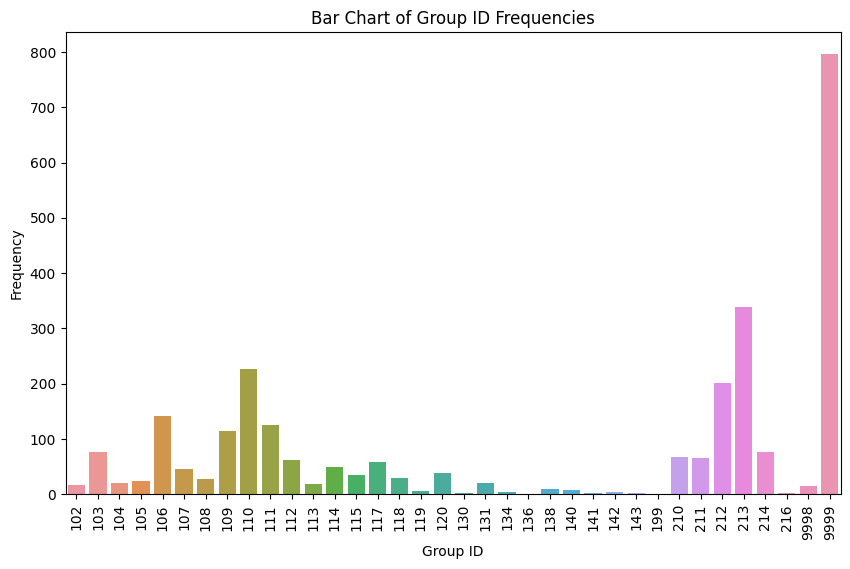

In [ ]:
# Bar Chart - Frequency Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Group ID', data=df1)
plt.title('Bar Chart of Group ID Frequencies')
plt.xlabel('Group ID')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

In [ ]:
df1.shape

(2736, 3)

In [ ]:
# Checking the data types of all the columns
df1.dtypes

Product ID     int64
Product       object
Group ID       int64
dtype: object

In [ ]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Product ID  2736 non-null   int64 
 1   Product     2736 non-null   object
 2   Group ID    2736 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 64.2+ KB


In [ ]:
df1.isnull().sum()

Product ID    0
Product       0
Group ID      0
dtype: int64

In [ ]:
df2 = pd.read_excel('/content/DimensionTables.xlsx', sheet_name='ProductGroup')

In [ ]:
df2

,Group ID,Group,Category
0,102,Powdered Milk,Food
1,103,Sugars,Food
2,104,Canned Sweets,Food
3,105,Flours,Food
4,106,Oils,Food
5,107,Olive Oils,Food
6,108,Coffee Pods,Food
7,109,Horticulture,Food
8,110,Wheat Flours,Food
9,111,Yeast,Food


In [ ]:
df2.tail

<bound method NDFrame.tail of     Group ID                      Group Category
0        102              Powdered Milk     Food
1        103                     Sugars     Food
2        104              Canned Sweets     Food
3        105                     Flours     Food
4        106                       Oils     Food
5        107                 Olive Oils     Food
6        108                Coffee Pods     Food
7        109               Horticulture     Food
8        110               Wheat Flours     Food
9        111                      Yeast     Food
10       112                  Sprinkles     Food
11       113                    Popcorn     Food
12       114                     Crumbs     Food
13       115              Ground Coffee     Food
14       117                     Spices     Food
15       118                     Sweets     Food
16       119              Tomato Sauces     Food
17       120               Tomato Paste     Food
18       130  Self-Raising Wheat Flours

In [ ]:
df2.shape

(36, 3)

In [ ]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Group ID  36 non-null     int64 
 1   Group     36 non-null     object
 2   Category  36 non-null     object
dtypes: int64(1), object(2)
memory usage: 992.0+ bytes


In [ ]:
# Checking the data types of all the columns
df2.dtypes

Group ID     int64
Group       object
Category    object
dtype: object

In [ ]:
df2.isnull().sum()

Group ID    0
Group       0
Category    0
dtype: int64

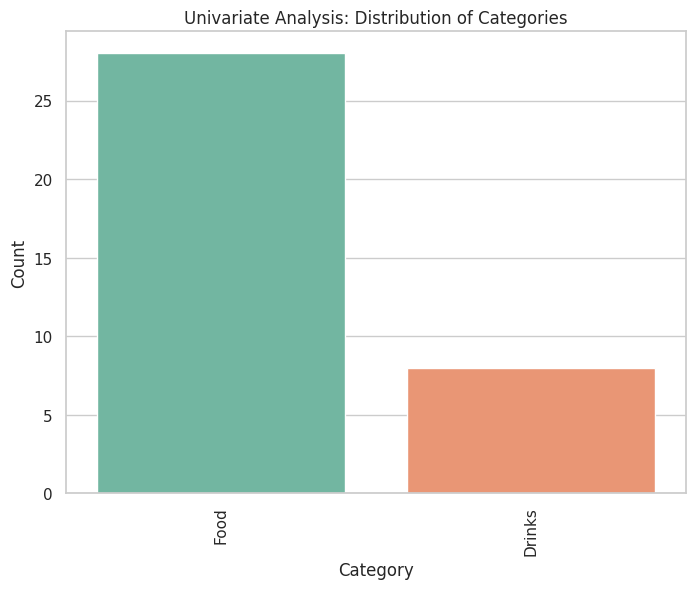

In [ ]:
# Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(data=df2, x='Category', palette='Set2')
plt.title('Univariate Analysis: Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

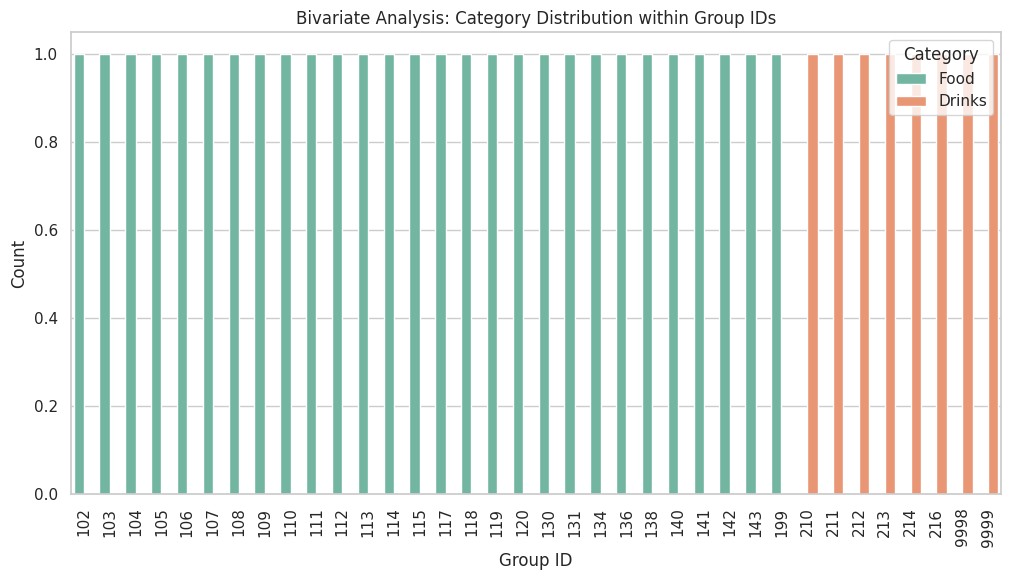

In [ ]:
# Bivariate Analysis - 'Group ID' vs. 'Category'

# Bar Chart
plt.figure(figsize=(12, 6))
sns.countplot(data=df2, x='Group ID', hue='Category', palette='Set2')
plt.title('Bivariate Analysis: Category Distribution within Group IDs')
plt.xlabel('Group ID')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Category', loc='upper right')
plt.show()


In [ ]:
df3 = pd.read_excel('/content/DimensionTables.xlsx', sheet_name='SalesPerson')

In [ ]:
df3

,SalesPerson ID,SalesPerson,Supervisor ID,Supervisor,Manager ID,Manager,Team
0,669,Ayaana Mackenzie,15,Jonathon Childs,1,Ronnie Daly,Retail
1,660,Tess Sanderson,25,Jessica Valentine,1,Ronnie Daly,Retail
2,183,Hywel Hopkins,25,Jessica Valentine,1,Ronnie Daly,Retail
3,102,Serenity Rich,25,Jessica Valentine,1,Ronnie Daly,Retail
4,196,Gillian Gonzales,30,Sarah-Jayne Pennington,1,Ronnie Daly,Retail
5,215,Sahil Seymour,30,Sarah-Jayne Pennington,1,Ronnie Daly,Retail
6,125,Akeel Mcleod,35,Tahmina Vinson,2,Duane Frame,Distributors
7,265,Shakil Durham,35,Tahmina Vinson,2,Duane Frame,Distributors
8,194,Kien Mcgee,35,Tahmina Vinson,2,Duane Frame,Distributors
9,144,Dominykas Bird,55,Harvey-Lee Solomon,2,Duane Frame,Online


In [ ]:
df3.shape

(12, 7)

In [ ]:
df3.columns

Index(['SalesPerson ID', 'SalesPerson', 'Supervisor ID', 'Supervisor',
       'Manager ID', 'Manager', 'Team'],
      dtype='object')

In [ ]:
df3.dtypes

SalesPerson ID     int64
SalesPerson       object
Supervisor ID      int64
Supervisor        object
Manager ID         int64
Manager           object
Team              object
dtype: object

In [ ]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SalesPerson ID  12 non-null     int64 
 1   SalesPerson     12 non-null     object
 2   Supervisor ID   12 non-null     int64 
 3   Supervisor      12 non-null     object
 4   Manager ID      12 non-null     int64 
 5   Manager         12 non-null     object
 6   Team            12 non-null     object
dtypes: int64(3), object(4)
memory usage: 800.0+ bytes


In [ ]:
df3.isnull().sum()

SalesPerson ID    0
SalesPerson       0
Supervisor ID     0
Supervisor        0
Manager ID        0
Manager           0
Team              0
dtype: int64

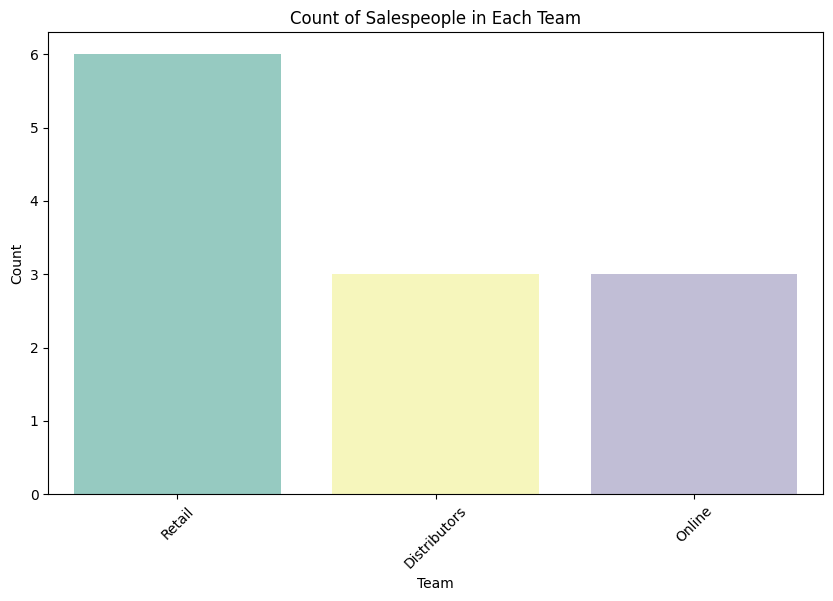

In [ ]:
# Univariate Analysis: Count of Salespeople in Each Team
plt.figure(figsize=(10, 6))
sns.countplot(data=df3, x="Team", palette="Set3")
plt.title("Count of Salespeople in Each Team")
plt.xlabel("Team")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

###Insights

1.   The highest number of sales people is in the Retail Team

2.   Distributers and Online team has equal numbers of sales people


Distributers

<Figure size 1000x600 with 0 Axes>

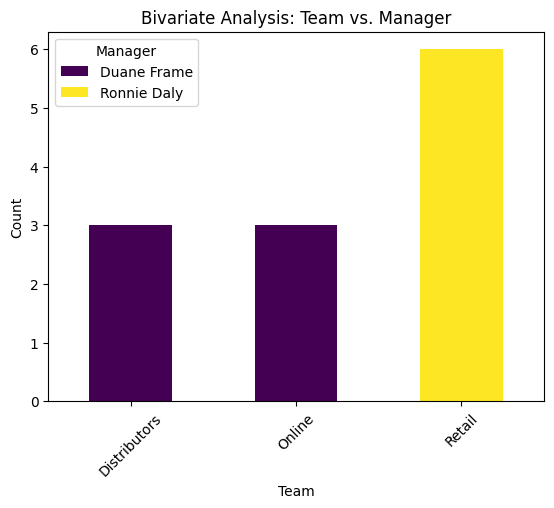

In [ ]:
# Bivariate Analysis: Team vs. Manager with Stacked Bar Graph
cross_tab = pd.crosstab(df3["Team"], df3["Manager"])
plt.figure(figsize=(10, 6))
cross_tab.plot(kind="bar", stacked=True, colormap="viridis")
plt.title("Bivariate Analysis: Team vs. Manager")
plt.xlabel("Team")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Manager")
plt.show()


###Insights
1.   Ronie Daly is handling Retailers Team
2.   Duane Frame is handling other two teams



In [ ]:
df4 = pd.read_excel('/content/DimensionTables.xlsx', sheet_name='Dates')

In [ ]:
df4

,Dates,Year,Month Name,Month,Day
0,2017-01-01,2017,January,1,1
1,2017-01-02,2017,January,1,2
2,2017-01-03,2017,January,1,3
3,2017-01-04,2017,January,1,4
4,2017-01-05,2017,January,1,5
...,...,...,...,...,...
1090,2019-12-27,2019,December,12,27
1091,2019-12-28,2019,December,12,28
1092,2019-12-29,2019,December,12,29
1093,2019-12-30,2019,December,12,30


In [ ]:
df4.shape

(1095, 5)

In [ ]:
df4.info

<bound method DataFrame.info of           Dates  Year Month Name  Month  Day
0    2017-01-01  2017    January      1    1
1    2017-01-02  2017    January      1    2
2    2017-01-03  2017    January      1    3
3    2017-01-04  2017    January      1    4
4    2017-01-05  2017    January      1    5
...         ...   ...        ...    ...  ...
1090 2019-12-27  2019   December     12   27
1091 2019-12-28  2019   December     12   28
1092 2019-12-29  2019   December     12   29
1093 2019-12-30  2019   December     12   30
1094 2019-12-31  2019   December     12   31

[1095 rows x 5 columns]>

In [ ]:
df4.dtypes

Dates         datetime64[ns]
Year                   int64
Month Name            object
Month                  int64
Day                    int64
dtype: object

In [ ]:

df4.isnull().sum()

Dates         0
Year          0
Month Name    0
Month         0
Day           0
dtype: int64

In [ ]:
df5 = pd.read_excel('/content/Sales 2017.xlsx')

In [ ]:
df5

,Issue Date,Due Date,Invoice Number,Customer ID,SalesPerson ID,Product ID,Qty Itens,Unit Price,Net Weight
0,2017-01-12,2017-02-22,1492762,3140218,265,1073,6,8.83,0.60
1,2017-01-12,2017-02-22,1492762,3140218,265,1420,6,4.44,5.40
2,2017-01-12,2017-02-22,1492762,3140218,265,264,10,0.96,1.92
3,2017-01-13,2017-01-29,1492719,2983332,265,1154,6,2.92,1.26
4,2017-01-13,2017-01-29,1492719,2983332,265,1527,6,2.81,1.40
...,...,...,...,...,...,...,...,...,...
91589,2017-12-31,2018-02-01,1783471,3771379,215,662,12,9.81,1.69
91590,2017-12-31,2018-02-01,1783471,3771379,215,1767,12,4.31,1.69
91591,2017-12-31,2018-02-01,1783471,3771379,215,1769,12,4.27,1.69
91592,2017-12-31,2018-02-01,1783471,3771379,215,1527,12,2.99,1.69


In [ ]:
df5.shape

(91594, 9)

In [ ]:
df5.columns

Index(['Issue Date', 'Due Date', 'Invoice Number', 'Customer ID',
       'SalesPerson ID', 'Product ID', 'Qty Itens', 'Unit Price',
       'Net Weight'],
      dtype='object')

In [ ]:
df5.info

<bound method DataFrame.info of       Issue Date   Due Date  Invoice Number  Customer ID  SalesPerson ID  \
0     2017-01-12 2017-02-22         1492762      3140218             265   
1     2017-01-12 2017-02-22         1492762      3140218             265   
2     2017-01-12 2017-02-22         1492762      3140218             265   
3     2017-01-13 2017-01-29         1492719      2983332             265   
4     2017-01-13 2017-01-29         1492719      2983332             265   
...          ...        ...             ...          ...             ...   
91589 2017-12-31 2018-02-01         1783471      3771379             215   
91590 2017-12-31 2018-02-01         1783471      3771379             215   
91591 2017-12-31 2018-02-01         1783471      3771379             215   
91592 2017-12-31 2018-02-01         1783471      3771379             215   
91593 2017-12-31 2018-02-01         1783471      3771379             215   

       Product ID  Qty Itens  Unit Price  Net Weight  


In [ ]:
df5.dtypes

Issue Date        datetime64[ns]
Due Date          datetime64[ns]
Invoice Number             int64
Customer ID                int64
SalesPerson ID             int64
Product ID                 int64
Qty Itens                  int64
Unit Price               float64
Net Weight               float64
dtype: object

In [ ]:
df5.describe()

,Invoice Number,Customer ID,SalesPerson ID,Product ID,Qty Itens,Unit Price,Net Weight
count,9.159400e+04,9.159400e+04,91594.000000,91594.000000,91594.000000,91594.000000,91594.000000
mean,1.652316e+06,3.235100e+06,207.815163,1146.958436,23.662522,6.987051,4.528893
std,9.246629e+04,1.432309e+06,78.351405,756.366876,63.884595,13.886034,20.562286
min,1.491303e+06,6.156600e+05,102.000000,108.000000,1.000000,0.300000,0.050000
25%,1.578408e+06,2.862151e+06,144.000000,370.000000,6.000000,1.630000,0.990000
50%,1.651500e+06,3.771379e+06,215.000000,1133.000000,12.000000,2.970000,1.400000
75%,1.726891e+06,4.088384e+06,265.000000,1839.000000,24.000000,4.660000,3.570000
max,1.858354e+06,5.504276e+06,669.000000,2571.000000,7200.000000,157.600000,3600.000000


In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91594 entries, 0 to 91593
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Issue Date      91594 non-null  datetime64[ns]
 1   Due Date        91594 non-null  datetime64[ns]
 2   Invoice Number  91594 non-null  int64         
 3   Customer ID     91594 non-null  int64         
 4   SalesPerson ID  91594 non-null  int64         
 5   Product ID      91594 non-null  int64         
 6   Qty Itens       91594 non-null  int64         
 7   Unit Price      91594 non-null  float64       
 8   Net Weight      91594 non-null  float64       
 9   Revenue         91594 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(5)
memory usage: 7.0 MB


In [ ]:
df5.isnull().sum()

Issue Date        0
Due Date          0
Invoice Number    0
Customer ID       0
SalesPerson ID    0
Product ID        0
Qty Itens         0
Unit Price        0
Net Weight        0
Revenue           0
dtype: int64

In [ ]:
# Calculate sales revenue for each row
df5['Sales Revenue'] = df5['Qty Itens'] * df5['Unit Price'] * df5['Net Weight']

# Calculate the total revenue by summing all the sales revenue values
total_revenue = df5['Sales Revenue'].sum()

print("Total Revenue:", total_revenue)

Total Revenue: 28260695.833200004


In [ ]:
# Find the Product ID with the minimum sales revenue
min_revenue_product = df5.loc[df5['Sales Revenue'].idxmin()]

print("Product ID with Minimum Revenue:", min_revenue_product['Product ID'])
print("Minimum Revenue:", min_revenue_product['Sales Revenue'])

Product ID with Minimum Revenue: 379
Minimum Revenue: 1.1988


In [ ]:
# Calculate sales revenue for each row
df5['Sales Revenue'] = df5['Qty Itens'] * df5['Unit Price'] * df5['Net Weight']

# Find the Product ID with the maximum revenue
max_revenue_product = df5.loc[df5['Sales Revenue'].idxmax()]

print("Product ID with Maximum Revenue:", max_revenue_product['Product ID'])
print("Maximum Revenue:", max_revenue_product['Sales Revenue'])

Product ID with Maximum Revenue: 662
Maximum Revenue: 213813.6


###Top Customers 2017

In [ ]:


grouped = df5.groupby('Customer ID')['Sales Revenue'].sum().reset_index()

# 'grouped' will now contain the summed 'Sales Revenue' for each unique 'Customer ID'

# To sort the results in descending order by 'Sales Revenue' and get the top 10 customers
top_10_customers = grouped.sort_values(by='Sales Revenue', ascending=False).head(10)

# Print the top 10 customers and their summed sales values
print("Top 10 Customers by Sales Revenue:")
print(top_10_customers)


Top 10 Customers by Sales Revenue:
     Customer ID  Sales Revenue
53       1156855   2.705590e+06
178      3674579   1.713492e+06
314      3829420   7.590884e+05
542      5244610   6.490304e+05
363      4088384   5.624309e+05
52       1144926   5.493720e+05
273      3823041   5.225572e+05
118      2928031   4.913535e+05
369      4130641   4.759001e+05
121      2930693   4.752158e+05


In [ ]:
# Merge the 'top_n_customers' DataFrame with the 'df' DataFrame to get company names
top_customers_with_names = top_10_customers.merge(df, on='Customer ID', how='left')

# Display the top customers with their company names
print("Top Customers with Company Names:")
print(top_customers_with_names)

Top Customers with Company Names:
   Customer ID  Sales Revenue         Company Name Status  Line of Business  \
0      1156855   2.705590e+06             Red beat      A  Supermarkets Lv3   
1      3674579   1.713492e+06      Leopard Records      A  Supermarkets Lv2   
2      3829420   7.590884e+05              Codehow      A  Supermarkets Lv3   
3      5244610   6.490304e+05         Flux Records      A     Wholesale Lv2   
4      4088384   5.624309e+05          Dragon walk      A  Distributors Lv3   
5      1144926   5.493720e+05     Ceasar Softwares      A  Supermarkets Lv2   
6      3823041   5.225572e+05  Hummingbird Limited      A            B & Bs   
7      2928031   4.913535e+05             Low Tide      A  Supermarkets Lv2   
8      4130641   4.759001e+05             Beta paw      A  Supermarkets Lv3   
9      2930693   4.752158e+05              Oak bar      A  Distributors Lv1   

         City State  
0      Roslyn    WA  
1      Morton    WA  
2  Littlerock    WA  
3      B

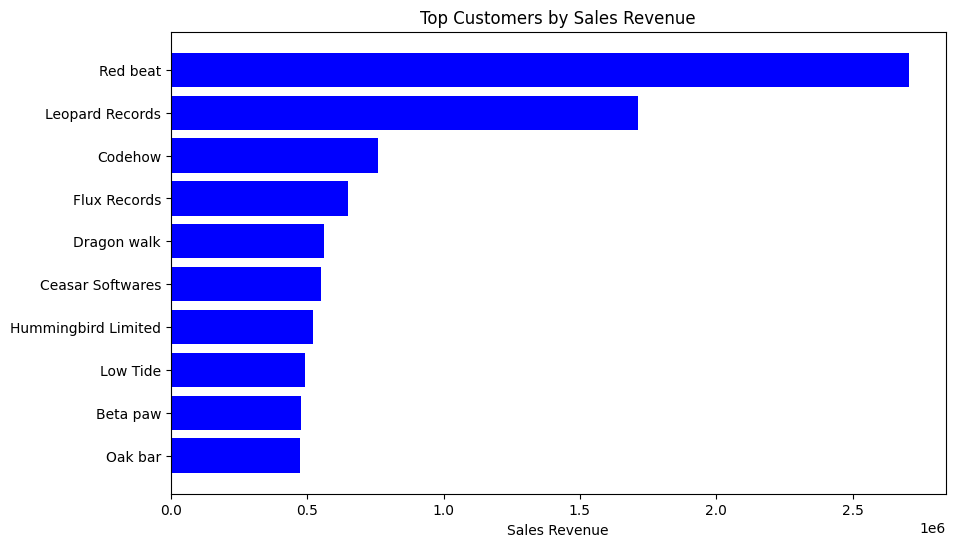

In [ ]:

# Sort the merged DataFrame by 'Sales Revenue' in descending order
merged_customers = top_customers_with_names.sort_values(by='Sales Revenue', ascending=False)

# Select the top N customers
top_n = 10
top_customers = top_customers_with_names

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_customers['Company Name'], top_customers['Sales Revenue'], color='blue')
plt.xlabel('Sales Revenue')
plt.title('Top Customers by Sales Revenue')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest revenue at the top
plt.show()

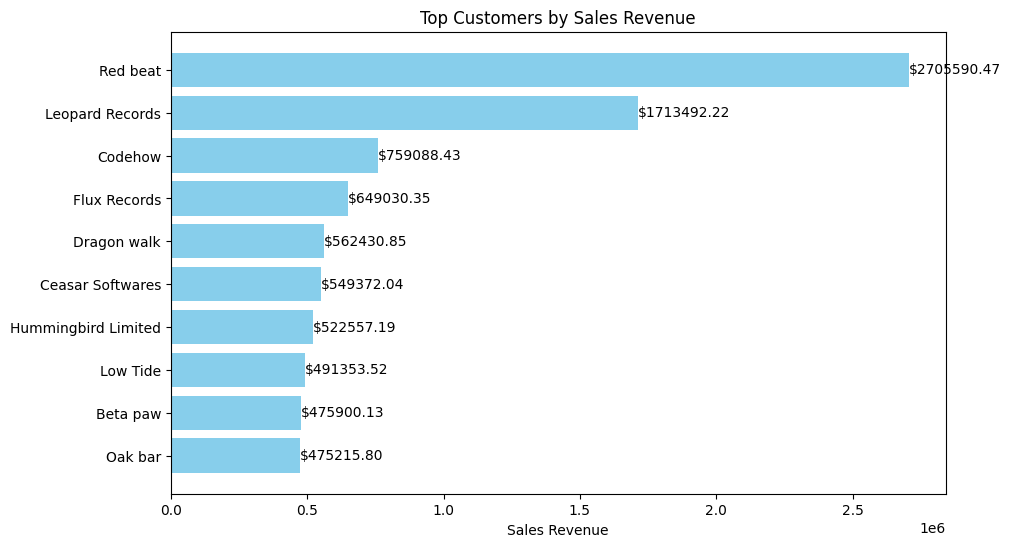

In [ ]:
# Sort the merged DataFrame by 'Sales Revenue' in descending order
merged_customers = top_customers_with_names.sort_values(by='Sales Revenue', ascending=False)

# Select the top N customers
top_n = 10
top_customers = top_customers_with_names

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(top_customers['Company Name'], top_customers['Sales Revenue'], color='skyblue')
plt.xlabel('Sales Revenue')
plt.title('Top Customers by Sales Revenue')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest revenue at the top

# Add revenue amounts at the end of each bar
for i, revenue in enumerate(top_customers['Sales Revenue']):
    plt.text(revenue, i, f'${revenue:.2f}', va='center')

plt.show()







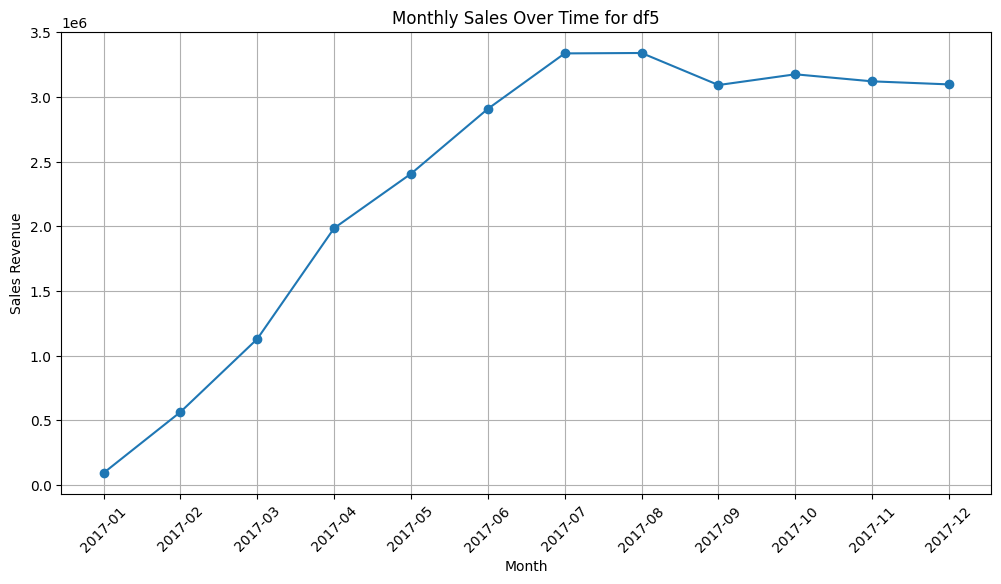

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Issue Date' to datetime if it's not already
df5['Issue Date'] = pd.to_datetime(df5['Issue Date'])

# Calculate 'Sales Revenue' by multiplying 'Qty Itens,' 'Unit Price,' and 'Net Weight'
df5['Sales Revenue'] = df5['Qty Itens'] * df5['Unit Price'] * df5['Net Weight']

# Group data by month and calculate the total sales revenue for each month
monthly_sales = df5.groupby(df5['Issue Date'].dt.to_period('M'))['Sales Revenue'].sum()

# Convert 'Period' objects to strings for plotting
monthly_sales.index = monthly_sales.index.strftime('%Y-%m')

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Sales Revenue')
plt.title('Monthly Sales Over Time for df5')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


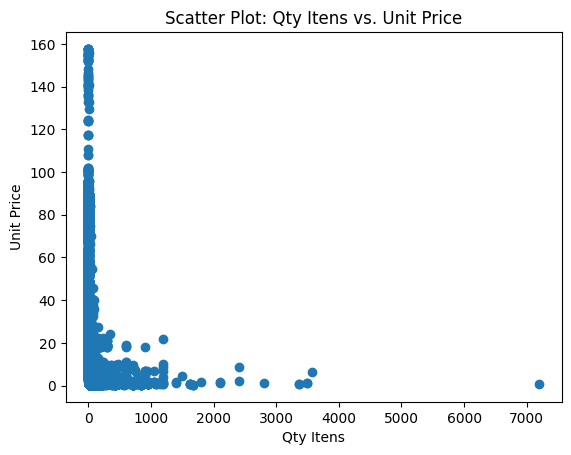

In [ ]:
# Create a scatter plot
plt.scatter(df5['Qty Itens'], df5['Unit Price'])
plt.xlabel('Qty Itens')
plt.ylabel('Unit Price')
plt.title('Scatter Plot: Qty Itens vs. Unit Price')
plt.show()

In [ ]:
x = df5['Qty Itens']
y = df5['Unit Price']

n = len(x)
mean_x = np.mean(x)
mean_y = np.mean(y)

numerator = np.sum((x - mean_x) * (y - mean_y))
denominator_x = np.sum((x - mean_x) ** 2)
denominator_y = np.sum((y - mean_y) ** 2)

correlation_coefficient = numerator / (np.sqrt(denominator_x) * np.sqrt(denominator_y))
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")

Pearson Correlation Coefficient: -0.10455221083860339


###Pearson Correlation Coefficient of -0.104 indicates a very weak negative linear correlation between the 'Qty Itens' and 'Unit Price.
### This means that there is a slight tendency for unit prices to decrease as the quantity of items increases, but the relationship is not strong.




In [ ]:
# Calculate revenue for each product
df5['Revenue'] = df5['Qty Itens'] * df5['Unit Price']

# Group by Product ID and calculate total revenue
product_revenue = df5.groupby('Product ID')['Revenue'].sum()

# Find the product with the maximum total revenue
max_revenue_product = product_revenue.idxmax()
max_revenue = product_revenue.max()

print(f"Product ID with the maximum revenue: {max_revenue_product}")
print(f"Maximum revenue: {max_revenue}")

Product ID with the maximum revenue: 2026
Maximum revenue: 308568.24


In [ ]:
correlation_matrix = df5[['Qty Itens', 'Unit Price', 'Net Weight']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
            Qty Itens  Unit Price  Net Weight
Qty Itens    1.000000   -0.104552   -0.002132
Unit Price  -0.104552    1.000000   -0.010493
Net Weight  -0.002132   -0.010493    1.000000


####**Insights**
##The correlation matrix you've provided indicates the pairwise correlations between the variables "Qty Itens," "Unit Price," and "Net Weight." Here's how to interpret the data in the correlation matrix:




#In summary,  there are only weak or very weak correlations between these variables, suggesting that they are not strongly dependent on each other. This interpretation is based on the correlation coefficients ranging from -1 to 1, with values closer to 0 indicating weaker correlations.

In [ ]:
# Calculate revenue for each product, considering both quantity and net weight
df5['Revenue'] = df5['Qty Itens'] * df5['Unit Price'] * df5['Net Weight']

# Group by Product ID and calculate total revenue
product_revenue = df5.groupby('Product ID')['Revenue'].sum()

# Find the product with the maximum total revenue
max_revenue_product = product_revenue.idxmax()
max_revenue = product_revenue.max()

print(f"Product ID with the maximum revenue (considering Net Weight): {max_revenue_product}")
print(f"Maximum revenue: {max_revenue}")

Product ID with the maximum revenue (considering Net Weight): 662
Maximum revenue: 1154300.3472


In [ ]:
# Calculate revenue for each row, considering Net Weight
df5['Revenue'] = df5['Qty Itens'] * df5['Unit Price'] * df5['Net Weight']

# Find the maximum revenue value
max_revenue = df5['Revenue'].max()

print(f"Maximum revenue: {max_revenue}")

Maximum revenue: 213813.6


In [ ]:
# Calculate revenue for each product, considering both quantity and net weight
df5['Revenue'] = df5['Qty Itens'] * df5['Unit Price'] * df5['Net Weight']

# Find the 'Product ID' with the maximum revenue
max_revenue_product_id = df5.loc[df5['Revenue'].idxmax()]['Product ID']

print(f"Product ID with the maximum revenue: {max_revenue_product_id}")

Product ID with the maximum revenue: 662


In [ ]:
# Calculate revenue for each row, considering Net Weight
df5['Revenue'] = df5['Qty Itens'] * df5['Unit Price'] * df5['Net Weight']

# Find the 'SalesPerson ID' with the maximum revenue
max_revenue_salesperson_id = df5.loc[df5['Revenue'].idxmax()]['SalesPerson ID']

print(f"SalesPerson ID with the maximum revenue: {max_revenue_salesperson_id}")

SalesPerson ID with the maximum revenue: 125


##**2018** data

In [ ]:
df6 = pd.read_excel('/content/Sales 2018.xlsx')

In [ ]:
df6.shape


(154254, 9)

In [ ]:
df6.columns

Index(['Issue Date', 'Due Date', 'Invoice Number', 'Customer ID',
       'SalesPerson ID', 'Product ID', 'Qty Itens', 'Unit Price',
       'Net Weight'],
      dtype='object')

In [ ]:
df6.describe()

,Invoice Number,Customer ID,SalesPerson ID,Product ID,Qty Itens,Unit Price,Net Weight
count,1.542540e+05,1.542540e+05,154254.000000,154254.000000,154254.000000,154254.000000,154254.000000
mean,2.001538e+06,3.388068e+06,223.194659,1338.035856,25.055026,6.634992,4.268966
std,1.057525e+05,1.469038e+06,101.460848,857.724639,89.812107,14.727082,19.351197
min,1.735761e+06,6.156600e+05,102.000000,108.000000,1.000000,0.030000,0.050000
25%,1.919515e+06,2.882072e+06,144.000000,468.000000,6.000000,1.600000,0.990000
50%,2.015929e+06,3.784234e+06,215.000000,1417.000000,12.000000,2.910000,1.400000
75%,2.089030e+06,4.383760e+06,265.000000,2233.000000,24.000000,4.650000,3.520000
max,2.175208e+06,5.802078e+06,669.000000,2687.000000,9000.000000,197.040000,2400.000000


In [ ]:
df6.dtypes

Issue Date        datetime64[ns]
Due Date          datetime64[ns]
Invoice Number             int64
Customer ID                int64
SalesPerson ID             int64
Product ID                 int64
Qty Itens                  int64
Unit Price               float64
Net Weight               float64
dtype: object

In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154254 entries, 0 to 154253
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Issue Date      154254 non-null  datetime64[ns]
 1   Due Date        154254 non-null  datetime64[ns]
 2   Invoice Number  154254 non-null  int64         
 3   Customer ID     154254 non-null  int64         
 4   SalesPerson ID  154254 non-null  int64         
 5   Product ID      154254 non-null  int64         
 6   Qty Itens       154254 non-null  int64         
 7   Unit Price      154254 non-null  float64       
 8   Net Weight      154254 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(5)
memory usage: 10.6 MB


In [ ]:
df6.isnull().sum()

Issue Date        0
Due Date          0
Invoice Number    0
Customer ID       0
SalesPerson ID    0
Product ID        0
Qty Itens         0
Unit Price        0
Net Weight        0
dtype: int64

In [ ]:
# Calculate sales revenue for each row
df6['Sales Revenue'] = df6['Qty Itens'] * df6['Unit Price'] * df6['Net Weight']

# Calculate the total revenue by summing all the sales revenue values
total_revenue = df6['Sales Revenue'].sum()

print("Total Revenue:", total_revenue)

Total Revenue: 41983024.93880001


In [ ]:
# Calculate sales revenue for each row
df6['Sales Revenue'] = df6['Qty Itens'] * df6['Unit Price'] * df6['Net Weight']

# Find the Product ID with the maximum revenue
max_revenue_product = df6.loc[df6['Sales Revenue'].idxmax()]

print("Product ID with Maximum Revenue:", max_revenue_product['Product ID'])
print("Maximum Revenue:", max_revenue_product['Sales Revenue'])

Product ID with Maximum Revenue: 1948
Maximum Revenue: 553608.0


In [ ]:


# Find the 'SalesPerson ID' with the maximum revenue
max_revenue_salesperson_id = df6.loc[df6['Sales Revenue'].idxmax()]['SalesPerson ID']

print(f"SalesPerson ID with the maximum revenue: {max_revenue_salesperson_id}")

SalesPerson ID with the maximum revenue: 125


##**2018 TOP CUSTOMERS**

In [ ]:

grouped = df6.groupby('Customer ID')['Sales Revenue'].sum().reset_index()

# 'grouped' will now contain the summed 'Sales Revenue' for each unique 'Customer ID'

# To sort the results in descending order by 'Sales Revenue' and get the top 10 customers
top_10_customers = grouped.sort_values(by='Sales Revenue', ascending=False).head(10)

# Print the top 10 customers and their summed sales values
print("Top 10 Customers by Sales Revenue:")
print(top_10_customers)


Top 10 Customers by Sales Revenue:
      Customer ID  Sales Revenue
115       1156855   3.150672e+06
410       3674579   2.062938e+06
643       3829420   9.665783e+05
112       1144926   9.366439e+05
319       2959783   7.934376e+05
1165      5504276   7.843628e+05
57         672177   6.434873e+05
720       4088384   5.902257e+05
954       4915588   5.541637e+05
596       3823041   5.265625e+05


In [ ]:
# Merge the 'top_n_customers' DataFrame with the 'df' DataFrame to get company names
top_customers_with_names = top_10_customers.merge(df, on='Customer ID', how='left')

# Display the top customers with their company names
print("Top Customers with Company Names:")
print(top_customers_with_names)

Top Customers with Company Names:
   Customer ID  Sales Revenue         Company Name Status  Line of Business  \
0      1156855   3.150672e+06             Red beat      A  Supermarkets Lv3   
1      3674579   2.062938e+06      Leopard Records      A  Supermarkets Lv2   
2      3829420   9.665783e+05              Codehow      A  Supermarkets Lv3   
3      1144926   9.366439e+05     Ceasar Softwares      A  Supermarkets Lv2   
4      2959783   7.934376e+05          Deluge Coms      A  Supermarkets Lv3   
5      5504276   7.843628e+05            Green Co.      A  Supermarkets Lv3   
6       672177   6.434873e+05    Prophecy Lighting      A  Supermarkets Lv3   
7      4088384   5.902257e+05          Dragon walk      A  Distributors Lv3   
8      4915588   5.541637e+05   Primal Enterprises      I  Supermarkets Lv3   
9      3823041   5.265625e+05  Hummingbird Limited      A            B & Bs   

         City State  
0      Roslyn    WA  
1      Morton    WA  
2  Littlerock    WA  
3      M

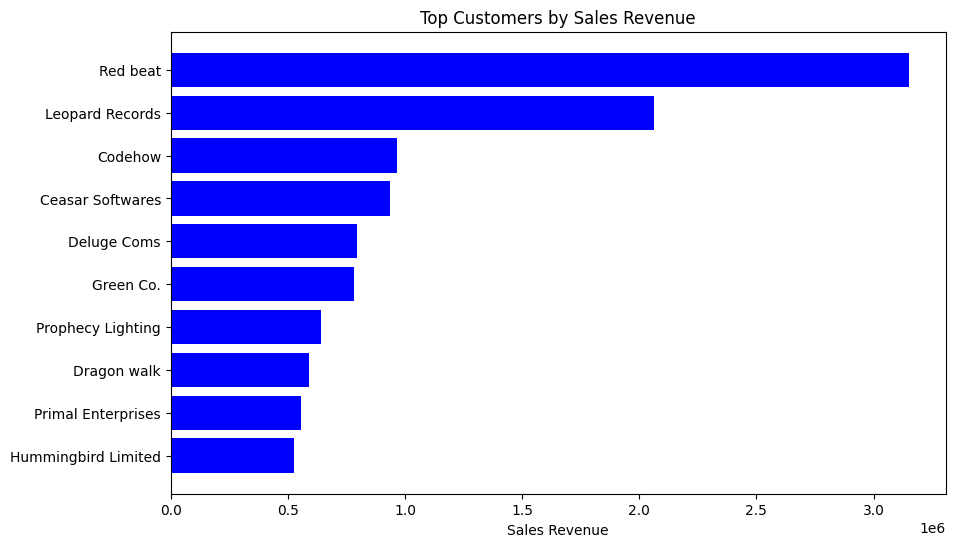

In [ ]:
# Sort the merged DataFrame by 'Sales Revenue' in descending order
merged_customers = top_customers_with_names.sort_values(by='Sales Revenue', ascending=False)

# Select the top N customers
top_n = 10
top_customers = top_customers_with_names

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_customers['Company Name'], top_customers['Sales Revenue'], color='blue')
plt.xlabel('Sales Revenue')
plt.title('Top Customers by Sales Revenue')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest revenue at the top
plt.show()

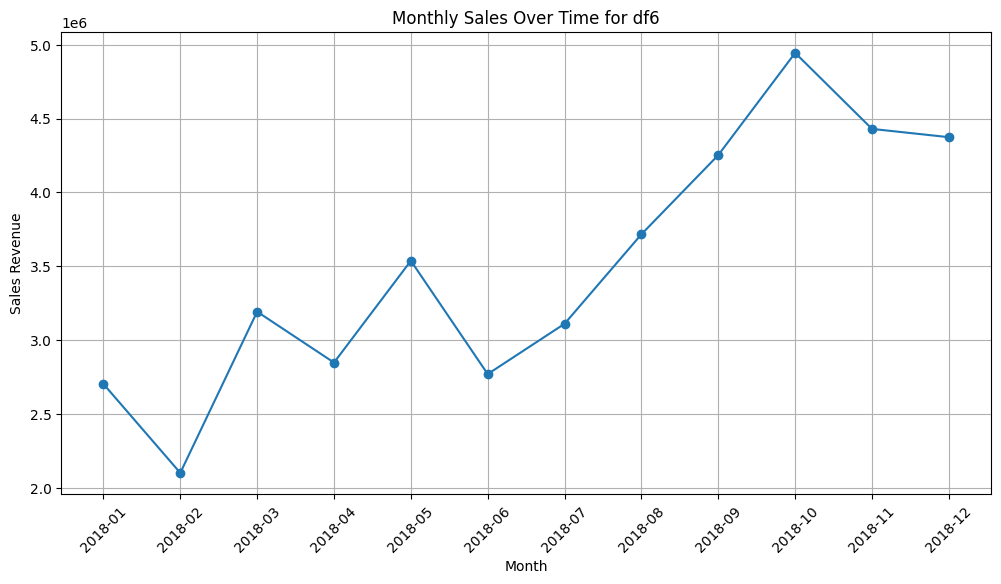

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Issue Date' to datetime if it's not already
df6['Issue Date'] = pd.to_datetime(df6['Issue Date'])

# Calculate 'Sales Revenue' by multiplying 'Qty Itens,' 'Unit Price,' and 'Net Weight'
df6['Sales Revenue'] = df6['Qty Itens'] * df6['Unit Price'] * df6['Net Weight']

# Group data by month and calculate the total sales revenue for each month
monthly_sales = df6.groupby(df6['Issue Date'].dt.to_period('M'))['Sales Revenue'].sum()

# Convert 'Period' objects to strings for plotting
monthly_sales.index = monthly_sales.index.strftime('%Y-%m')

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Sales Revenue')
plt.title('Monthly Sales Over Time for df6')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
df7=pd.read_excel('/content/Sales 2019.xlsx')

In [ ]:
df7

,Issue Date,Due Date,Invoice Number,Customer ID,SalesPerson ID,Product ID,Qty Itens,Unit Price,Net Weight
0,2019-01-01,2019-02-01,2123073,3785072,285,1154,6,3.25,0.30
1,2019-01-01,2019-02-08,2149604,3799504,326,1154,6,3.25,0.30
2,2019-01-01,2019-02-09,2173654,2957188,326,1154,6,3.20,0.30
3,2019-01-01,2019-01-21,2113210,3854414,326,1154,6,3.33,0.30
4,2019-01-01,2019-01-28,2156463,2950203,102,1154,6,2.62,1.38
...,...,...,...,...,...,...,...,...,...
14243,2019-03-12,2019-04-14,2173547,673190,265,202,24,1.62,1.50
14244,2019-03-12,2019-04-14,2173547,673190,265,1154,12,3.25,1.75
14245,2019-03-12,2019-04-14,2173547,673190,265,668,12,3.26,1.00
14246,2019-03-12,2019-04-14,2173547,673190,265,1527,12,3.14,1.00


In [ ]:
df7.tail()

,Issue Date,Due Date,Invoice Number,Customer ID,SalesPerson ID,Product ID,Qty Itens,Unit Price,Net Weight
14243,2019-03-12,2019-04-14,2173547,673190,265,202,24,1.62,1.50
14244,2019-03-12,2019-04-14,2173547,673190,265,1154,12,3.25,1.75
14245,2019-03-12,2019-04-14,2173547,673190,265,668,12,3.26,1.00
14246,2019-03-12,2019-04-14,2173547,673190,265,1527,12,3.14,1.00
14247,2019-03-13,2019-04-05,2172961,3771379,215,257,6,4.42,1.20


In [ ]:
df7.shape

(14248, 9)

In [ ]:
df7.columns

Index(['Issue Date', 'Due Date', 'Invoice Number', 'Customer ID',
       'SalesPerson ID', 'Product ID', 'Qty Itens', 'Unit Price',
       'Net Weight'],
      dtype='object')

In [ ]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14248 entries, 0 to 14247
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Issue Date      14248 non-null  datetime64[ns]
 1   Due Date        14248 non-null  datetime64[ns]
 2   Invoice Number  14248 non-null  int64         
 3   Customer ID     14248 non-null  int64         
 4   SalesPerson ID  14248 non-null  int64         
 5   Product ID      14248 non-null  int64         
 6   Qty Itens       14248 non-null  int64         
 7   Unit Price      14248 non-null  float64       
 8   Net Weight      14248 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(5)
memory usage: 1001.9 KB


In [ ]:
df7.describe()

NameError: ignored

In [ ]:
df7.dtypes

Issue Date        datetime64[ns]
Due Date          datetime64[ns]
Invoice Number             int64
Customer ID                int64
SalesPerson ID             int64
Product ID                 int64
Qty Itens                  int64
Unit Price               float64
Net Weight               float64
dtype: object

In [ ]:
df7.isnull().sum()

Issue Date        0
Due Date          0
Invoice Number    0
Customer ID       0
SalesPerson ID    0
Product ID        0
Qty Itens         0
Unit Price        0
Net Weight        0
dtype: int64

In [ ]:
# Calculate revenue for each row, considering Net Weight
df7['Revenue'] = df7['Qty Itens'] * df7['Unit Price'] * df7['Net Weight']

# Calculate total revenue for the entire dataset
total_revenue = df7['Revenue'].sum()

print(f"Total Revenue: {total_revenue}")

Total Revenue: 3725292.4738999996


In [ ]:
# Calculate revenue for each row, considering Net Weight
df7['Revenue'] = df7['Qty Itens'] * df7['Unit Price'] * df7['Net Weight']

# Find the 'Product ID' with the maximum revenue
max_revenue_product_id = df7.loc[df7['Revenue'].idxmax()]['Product ID']

print(f"Product ID with the maximum revenue: {max_revenue_product_id}")

Product ID with the maximum revenue: 2472


In [ ]:
# Calculate revenue for each row, considering Net Weight
df7['Revenue'] = df7['Qty Itens'] * df7['Unit Price'] * df7['Net Weight']

# Find the 'SalesPerson ID' with the maximum revenue
max_revenue_salesperson_id = df7.loc[df7['Revenue'].idxmax()]['SalesPerson ID']

print(f"SalesPerson ID with the maximum revenue: {max_revenue_salesperson_id}")

SalesPerson ID with the maximum revenue: 194


In [ ]:
df8=pd.read_excel('/content/Targets.xlsx',sheet_name='Targets1')

In [ ]:
df8

,SalesPersonID,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,...,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,Total
0,102,140768.312981,124258.753484,169509.931262,143465.231352,98423.627768,1.334019e+05,1.091250e+05,2.215972e+05,101603.974771,...,105568.516310,58743.776233,1.818304e+05,135931.360716,1.059770e+05,6.704898e+04,1.365945e+05,39370.133088,34296.939141,3.033854e+06
1,125,21525.584613,50778.518843,80286.310022,117769.055030,162043.205771,1.848893e+05,1.756296e+05,1.200975e+05,110607.719934,...,108730.296716,44662.552004,2.642508e+05,80597.535419,1.222510e+05,1.149777e+05,1.999054e+05,52701.549885,46867.563534,2.708057e+06
2,144,72301.437981,47360.516270,54145.357333,89457.661634,115437.266528,7.235685e+04,1.646891e+05,1.023307e+05,112396.578585,...,66398.357121,99162.551567,6.854631e+04,73499.767441,1.684500e+05,1.157703e+05,1.012631e+05,16718.894966,32769.773036,2.050896e+06
3,194,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,1.071177e+05,1.480424e+05,9.006023e+04,39364.546546,43339.557259,4.279244e+05
4,196,75253.911490,56094.071733,156709.108284,82723.073158,47426.320283,6.639822e+04,9.184046e+04,1.366809e+05,87425.550099,...,43642.489333,73916.754356,1.144453e+05,76255.523468,1.380852e+05,5.842535e+04,6.753764e+04,10161.933261,10380.642211,2.037217e+06
5,215,286012.898170,268739.946775,329813.357769,159143.436200,117572.134697,2.753787e+05,2.530135e+05,3.296688e+05,97924.044778,...,148977.354813,141750.581959,1.999667e+05,130411.152312,3.542534e+05,9.623831e+04,3.894758e+05,108939.167641,92452.268239,5.247943e+06
6,265,122199.726847,147007.556793,127262.128128,206980.493152,119509.500049,1.926233e+05,1.810883e+05,1.574706e+05,142684.494598,...,71697.097329,151967.912128,2.803183e+05,72180.826784,1.961080e+05,2.076998e+05,2.586985e+05,42788.689325,41797.670728,3.830828e+06
7,285,0.000000,0.000000,0.000000,0.000000,0.000000,3.927603e+04,3.547327e+04,7.345410e+04,36858.820090,...,62042.369773,61236.690490,2.239841e+05,211969.624286,1.136065e+05,6.183475e+04,1.140523e+05,103479.871020,31620.184254,1.651440e+06
8,326,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,108976.639574,1.636326e+05,125324.867886,1.837144e+05,5.328304e+04,1.105421e+05,80017.020901,56449.875993,8.819405e+05
9,660,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,28839.044051,18374.346287,4.721339e+04


In [ ]:
# Filter out rows where 'SalesPersonID' is 'Total'
df8 = df8[df8['SalesPersonID'] != 'Total']

# Convert 'SalesPersonID' to integers
df8['SalesPersonID'] = df8['SalesPersonID'].astype(int)

In [ ]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 10
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SalesPersonID        11 non-null     int64  
 1   2017-01-01 00:00:00  11 non-null     float64
 2   2017-02-01 00:00:00  11 non-null     float64
 3   2017-03-01 00:00:00  11 non-null     float64
 4   2017-04-01 00:00:00  11 non-null     float64
 5   2017-05-01 00:00:00  11 non-null     float64
 6   2017-06-01 00:00:00  11 non-null     float64
 7   2017-07-01 00:00:00  11 non-null     float64
 8   2017-08-01 00:00:00  11 non-null     float64
 9   2017-09-01 00:00:00  11 non-null     float64
 10  2017-10-01 00:00:00  11 non-null     float64
 11  2017-11-01 00:00:00  11 non-null     float64
 12  2017-12-01 00:00:00  11 non-null     float64
 13  2018-01-01 00:00:00  11 non-null     float64
 14  2018-02-01 00:00:00  11 non-null     float64
 15  2018-03-01 00:00:00  11 non-null     float

In [ ]:
df8.describe()

,SalesPersonID,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,...,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,Total
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01
mean,289.181818,65278.352007,63112.669445,83429.653891,72685.359139,60037.459554,93857.404143,101821.287004,117454.321046,74270.539546,...,64753.208219,79215.368801,149754.708262,88651.329263,147369.239109,92802.906798,146030.143029,50666.703145,39670.690621,2.166491e+06
std,197.494718,90017.761233,85688.587592,105392.549215,77039.201095,63226.967989,91564.927570,86170.862037,101249.732329,54509.428722,...,50413.018109,52610.157760,95970.690295,61119.170297,86082.535079,55031.082005,104841.483411,32991.465250,21738.218685,1.511094e+06
min,102.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10161.933261,10380.642211,4.721339e+04
25%,169.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19638.014833,17736.636361,36727.049194,18429.410045,...,21821.244666,51703.164118,91495.825155,70587.395182,110362.079446,60130.049968,95661.670789,31895.963979,29824.480200,1.266690e+06
50%,215.000000,21525.584613,47360.516270,54145.357333,82723.073158,47426.320283,68107.204618,109124.992168,120097.495562,97924.044778,...,66398.357121,73916.754356,163632.605958,76255.523468,131498.476929,96238.312649,114052.283242,39370.133088,34296.939141,2.037217e+06
75%,305.500000,98726.819168,90176.412609,141985.618206,130617.143191,116504.700612,159145.600173,170159.335554,154084.165498,111502.149260,...,105398.662663,119964.119036,211975.432955,127868.010099,176082.218374,115374.016159,169053.734702,66359.285393,45103.560396,2.870956e+06
max,669.000000,286012.898170,268739.946775,329813.357769,206980.493152,162043.205771,275378.659140,253013.473041,329668.760958,142684.494598,...,148977.354813,151967.912128,280318.281792,211969.624286,354253.441362,207699.802816,389475.774425,108939.167641,92452.268239,5.247943e+06


In [ ]:
df8.isnull().sum()

SalesPersonID          0
2017-01-01 00:00:00    0
2017-02-01 00:00:00    0
2017-03-01 00:00:00    0
2017-04-01 00:00:00    0
2017-05-01 00:00:00    0
2017-06-01 00:00:00    0
2017-07-01 00:00:00    0
2017-08-01 00:00:00    0
2017-09-01 00:00:00    0
2017-10-01 00:00:00    0
2017-11-01 00:00:00    0
2017-12-01 00:00:00    0
2018-01-01 00:00:00    0
2018-02-01 00:00:00    0
2018-03-01 00:00:00    0
2018-04-01 00:00:00    0
2018-05-01 00:00:00    0
2018-06-01 00:00:00    0
2018-07-01 00:00:00    0
2018-08-01 00:00:00    0
2018-09-01 00:00:00    0
2018-10-01 00:00:00    0
2018-11-01 00:00:00    0
2018-12-01 00:00:00    0
Total                  0
dtype: int64